TP 1 : Régression linéaire / polynomiale
======

# 0 - Introduction

L'objectif de ce premier TP est de se familiariser avec des outils d'apprentissage statistique. Nous les appliquerons à la régression linéaire et logistique.

Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [1791]:
#Ce bloc contient tous les imports nécessaires pour ce TP.

# import outils mathématique
import numpy as np
from numpy.linalg import inv

# import fonction d'affichage
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D # pour la gestion de figure 3D
import matplotlib.patches as mpatches

# import librairies d'apprentissage automatique
import sklearn as skl
import sklearn.datasets as data
import sklearn.linear_model

# Divers 
from IPython.display import display, Markdown

# 1 - Outils de base  <a id="title1"></a>
## 1.1 - Introduction aux  notebook Jupyter <a id="title1.1"></a>

Le code est à écrire en `python 3` à la suite des questions dans ce fichier. Vous appuierez soit sur le bouton *run cell*, soit sur les touches *Ctrl-Entrée* (ou *Shift-Entrée*), à l’intérieur de la zone de saisie, pour lancer l'exécution de vos commandes. Si la commande est en cours d’exécution une étoile apparaît à côté de la zone de saisie de la commande : In [\*]. Une fois le calcul achevé, l'étoile est remplacée par le numéro du "run" permettant de retrouver, par la suite, l'ordre de lancement de chaque bloc.

Commencez par importer les librairies nécessaires au TP, en exécutant le premier bloc du TP. Lancez ensuite le bloc ci-dessous. Vous devez obtenir les numéros de version des librairies installé sur votre machine.

In [1792]:
print('Version de numpy:',np.__version__)
print('Version de matplotlib:',matplotlib.__version__)

Version de numpy: 2.2.3
Version de matplotlib: 3.10.1


Exécutez la ligne suivante en vous plaçant dans la cellule et en appuyant sur *Ctrl+Entrée*.

In [1793]:
a = 1 
print(a)

1


Lancez la ligne suivante plusieurs fois. L'ordre d'exécution des blocs est important dans un notebook jupyter. Constatez les changements d'affichage produit.

In [1794]:
a += 1 
print(a)

2


Relancez le premier bloc définissant la variable `a=1` puis lancez le bloc suivant (remarquez bien les valeurs après `In [` ):

In [1795]:
print(a)

2


Vous pouvez utiliser l'aide à la complétion avec la touche `tab`. Testez avec la fonction `np.random.randn`.

In [1796]:
np.random.randn(1, 6)

array([[-0.53478967, -0.56311367,  1.52934095,  0.52542262,  1.69798628,
        -0.44086266]])

Vous pouvez accéder à une documentation simplifiée de la fonction avec `Shit+tab`. Pour plus d'information, cliquez sur le +. Il est possible d'accéder directement à la documentation détaillée en ajoutant `?` à la fin de la commande.
Testez avec la fonction `np.random.randn`.

In [1797]:
print(np.random.randn)

<bound method RandomState.randn of RandomState(MT19937) at 0x733B5EC34740>


In [1798]:
np.random.randn(7)

array([-0.53609899, -0.51591265, -0.0213217 ,  1.68418732, -0.50382432,
       -1.98440401,  0.88644571])

In [1799]:
np.random.randn?

Signature: np.random.randn(*args)
Docstring:
randn(d0, d1, ..., dn)

Return a sample (or samples) from the "standard normal" distribution.

.. note::
    This is a convenience function for users porting code from Matlab,
    and wraps `standard_normal`. That function takes a
    tuple to specify the size of the output, which is consistent with
    other NumPy functions like `numpy.zeros` and `numpy.ones`.

.. note::
    New code should use the
    `~numpy.random.Generator.standard_normal`
    method of a `~numpy.random.Generator` instance instead;
    please see the :ref:`random-quick-start`.

If positive int_like arguments are provided, `randn` generates an array
of shape ``(d0, d1, ..., dn)``, filled
with random floats sampled from a univariate "normal" (Gaussian)
distribution of mean 0 and variance 1. A single float randomly sampled
from the distribution is returned if no argument is provided.

Parameters
----------
d0, d1, ..., dn : int, optional
    The dimensions of the returned 

Pour aller plus loin: https://jupyter-notebook.readthedocs.io/en/stable/

## 1.2 - Introduction à la visualisation des données (Matplotlib)<a id="title1.2"></a>

Nous allons utiliser dans ce TP la librairie de visualisation `Matplotlib`. L'usage de cette librairie est simplifié dans les notebook jupyter. Je donnerai dans ce TP l'usage standard de la librairie, certaines instructions données pourront être facultatives dans un notebook mais serait indispensable dans un interpréteur python classique.

`Matplotlib` permet de construire une figure à visualiser. La création d'une figure ce fait à l'aide de l'instruction `plt.figure`. Toutes les instructions que l'on fait ensuite agissent sur la figure courante en mémoire mais ne sont pas directement visible. Afin de rendre effectivement visible la figure finale, on utilise l'instruction `plt.show`. Cette instruction est bloquante en python standard. 
Testez le code suivant affichant un `sinus` et un `cosinus`.

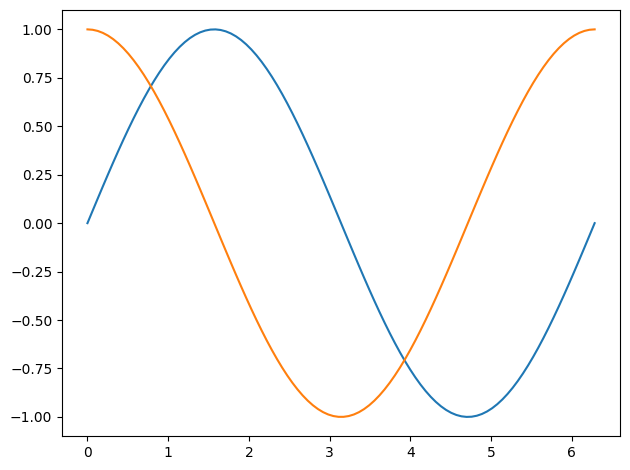

In [1800]:
x = np.linspace(0,2*np.pi,100) # création de 100 points entre 0 et 2pi
plt.figure() # Création d'une figure
plt.plot(x,np.sin(x)) # Ajout du tracé d'un sinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.plot(x,np.cos(x)) # Ajout du tracé d'un cosinus composé de 100 points reliés par des droites entre 0 et 2pi
plt.show() # Affichage de la figure créée.

Regardez le code suivant. Il permet de tracer la fonction sinus en rouge en mettant des carrés (square == s) aux points vraiment calculés et en les reliant par une droite. Le deuxième tracé est la fonction sinus en bleu, seuls les points calculés sont tracés à l'aide d'étoile.

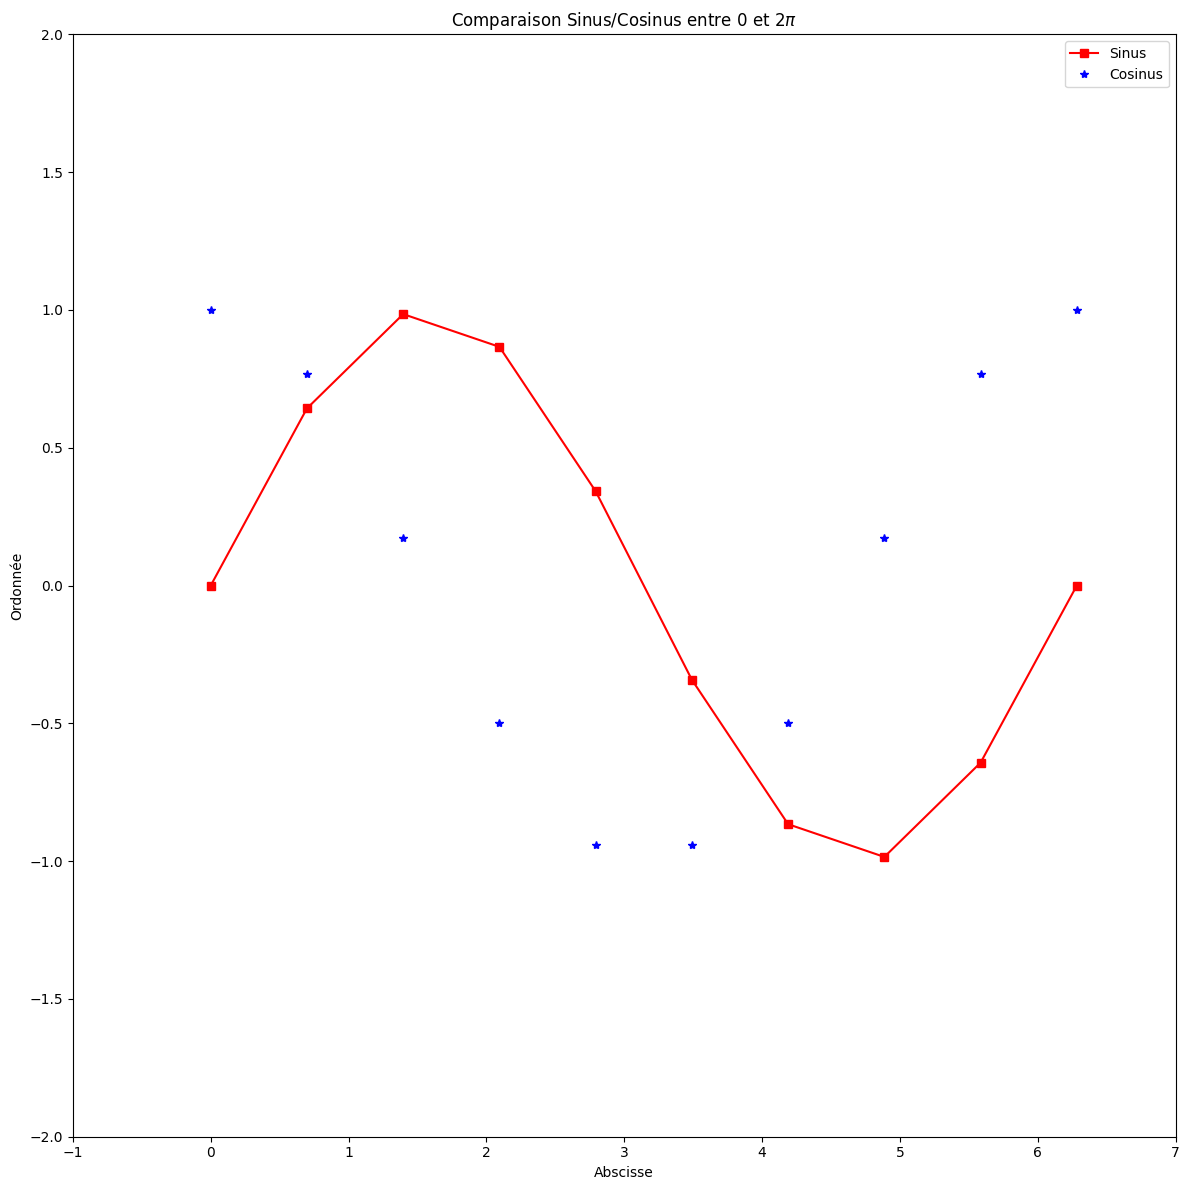

In [1801]:
x = np.linspace(0,2*np.pi,10)

plt.figure(figsize=(12,12)) # définition d'une figure en précisant sa taille

# Courbes
plt.plot(x,np.sin(x),'rs-',label='Sinus')
plt.plot(x,np.cos(x),'b*',label='Cosinus')

# Titre et légende
plt.title('Comparaison Sinus/Cosinus entre 0 et $2\\pi$')
plt.legend()

# Texte des axes
plt.xlabel('Abscisse')
plt.ylabel('Ordonnée')

# Définition des limites des axes
plt.xlim([-1,7])
plt.ylim([-2,2])

plt.show() # Affichage de la figure créée.

Attention l'ordre des points est important si on souhaite les relier:

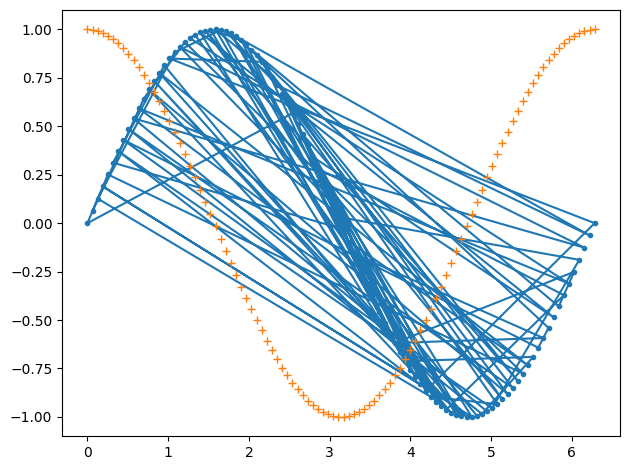

In [1802]:
x = np.linspace(0,2*np.pi,100)
np.random.shuffle(x)
plt.figure()
plt.plot(x,np.sin(x),'.-')
plt.plot(x,np.cos(x),'+')
plt.show()

Faites une figure affichant à la fois la fonction sinus cardinal de $\dfrac{x}{\pi}$ (vous pouvez utiliser `np.sinc`) et l'inverse de x. Vous mettrez la fonction inverse en pointillé. Vous ajouterez également un titre et une légende.

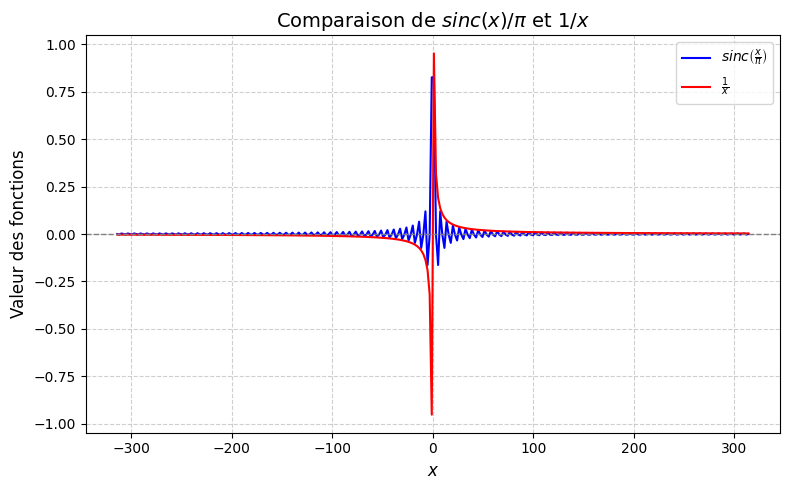

In [1803]:
# [ANSWER] 1.2
x = np.linspace(-100 * np.pi, 100 * np.pi, 300)
plt.figure(figsize=(8, 5))
plt.plot(x, np.sinc(x / np.pi), 'b', label=r'$sinc\left(\frac{x}{\pi}\right)$')
plt.plot(x, 1 / x, 'r-', label=r'$\frac{1}{x}$')


plt.title(r'Comparaison de $sinc(x)/\pi$ et $1/x$', fontsize=14)
plt.xlabel(r'$x$', fontsize=12)
plt.ylabel(r'Valeur des fonctions', fontsize=12)
plt.legend()

plt.axhline(0, color='gray', linestyle='--', linewidth=1)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

La fonction `plt.scatter` permet d'afficher spécifiquement des points qui ne seront pas reliés. Elle permet notamment d'afficher des points de couleurs et tailles différentes.

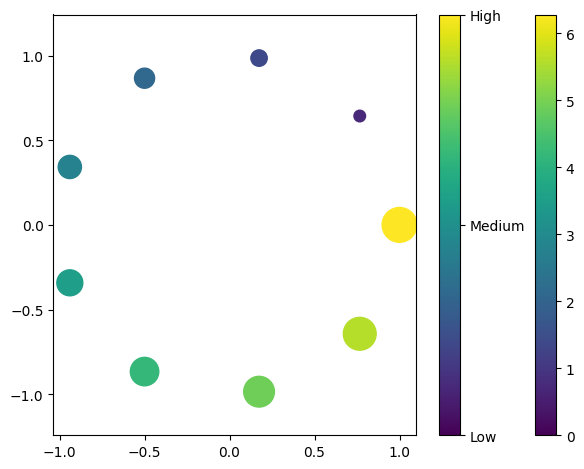

In [1804]:

t = np.linspace(0,2*np.pi,10)
plt.figure()
plt.scatter(np.cos(t),np.sin(t),c=t,s=100*t)
plt.axis('equal') # pour avoir des axes avec les mêmes proportions.
plt.colorbar() # Échelle des valeurs associées aux couleurs 

cbar = plt.colorbar(ticks=[0,np.pi,2*np.pi])
cbar.ax.set_yticklabels(["Low","Medium","High"])

plt.show()

La fonction `plt.imshow` permet d'afficher un tableau comme une image. Les valeurs doivent être soit entières entre 0 et 255 soit flottantes entre 0. et 1. .

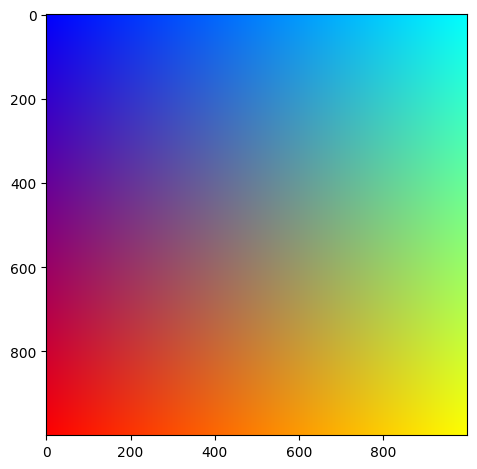

In [1805]:
n=int(1e3)
x = np.linspace(0,1,n)
degradee = np.tile(x[:,np.newaxis],n)
im = np.stack((degradee,degradee.T,1-degradee),axis=2)

plt.figure()
plt.imshow(im)
plt.show()

Si le tableau est une matrice, l'image sera affichée en fausse couleurs correspondant à la carte de couleur paramétrée. Pour avoir une image en noir et blanc, il faudra préciser `cmap='gray'`.

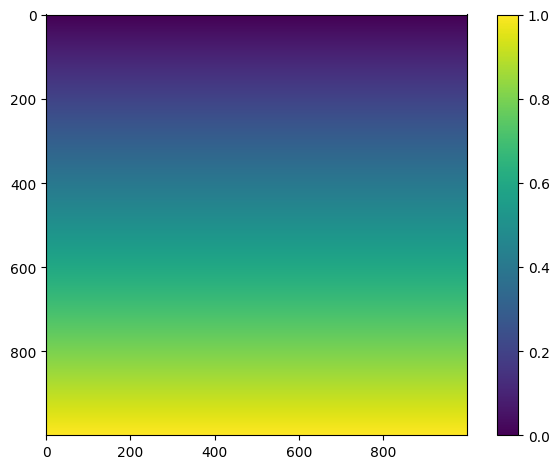

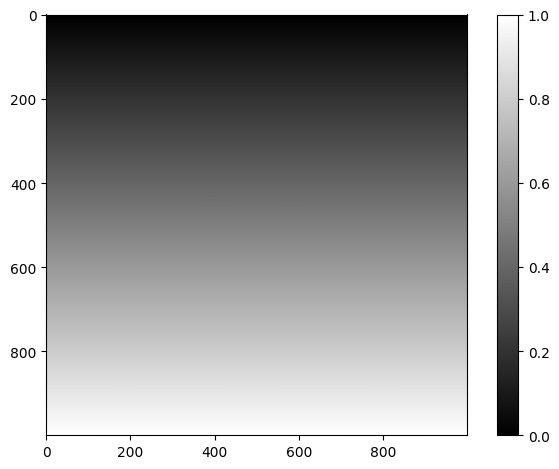

In [1806]:
plt.figure()
plt.imshow(degradee)
plt.colorbar()

plt.figure()
plt.imshow(degradee,cmap='gray')
plt.colorbar()

plt.show()

Il est possible d'afficher des points en 3D. Pour cela il faut définir une figure avec une projection 3D. Il est ensuite possible d'utiliser les fonctions précédemment vues comme `plt.scatter`.

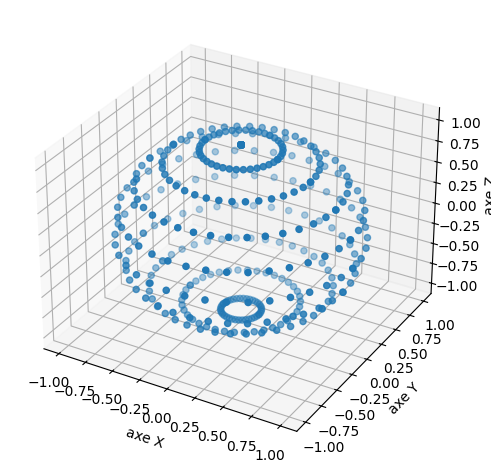

In [1807]:
t = np.linspace(0,2*np.pi,20)
t = np.stack(np.meshgrid(t,t),axis=2).reshape((-1,2))

ax = plt.figure().add_subplot(projection='3d') # définition d'une figure 3D

ax.scatter(
           np.cos(t[:,1])*np.sin(t[:,0]), # abscisse
           np.sin(t[:,1])*np.sin(t[:,0]), # ordonnée
           np.cos(t[:,0]) # profondeur
          )
ax.set_xlabel('axe X')
ax.set_ylabel('axe Y')
ax.set_zlabel('axe Z')
plt.show()

Il est possible de faire des figures avec des sous-figures en utilisant `plt.subplots`.

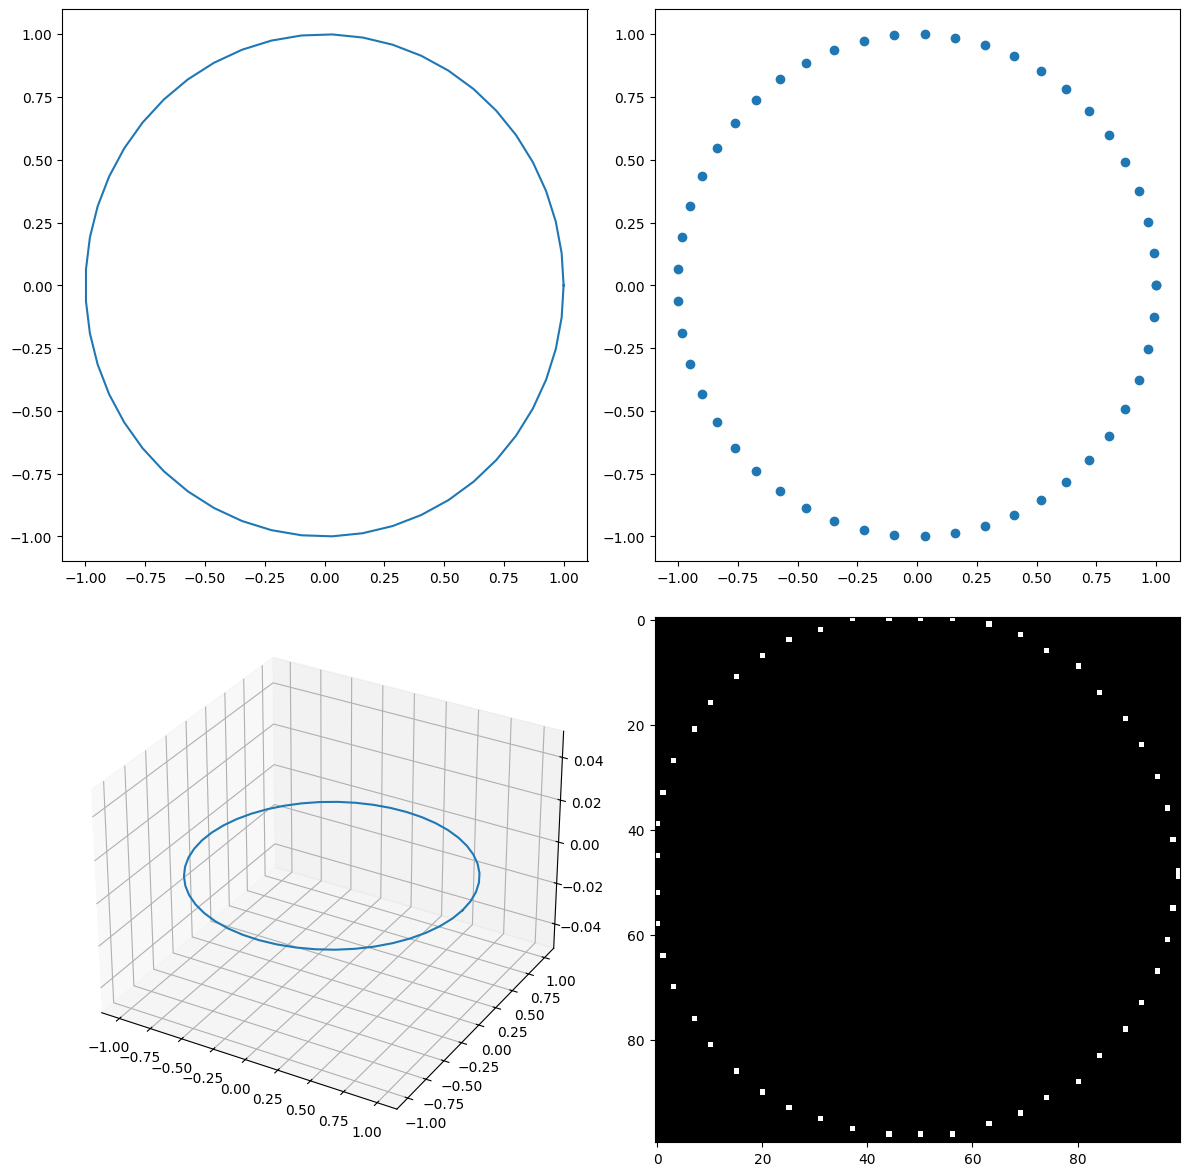

In [1808]:
x = np.linspace(0,2*np.pi,int(5e1))
fig = plt.figure(figsize=(12,12))

ax = fig.add_subplot(2, 2, 1)
ax.plot(np.cos(x),np.sin(x))

ax = fig.add_subplot(2, 2, 2)
ax.scatter(np.cos(x),np.sin(x))

ax = fig.add_subplot(2, 2, 3, projection='3d')
ax.plot(np.cos(x),np.sin(x))

ax = fig.add_subplot(2, 2, 4)
im = np.zeros((100,100))
im[(49+np.cos(x)*50).astype('int'),(49+np.sin(x)*50).astype('int')]=1
ax.imshow(im.T,cmap='gray')

plt.show()

## 1.3 Le calcul matriciel

Cette partie a pour but de reprendre rapidement les bases de numpy et notamment les éléments du tutoriel https://numpy.org/doc/stable/user/quickstart.html . N'hésitez pas à lire ce tutoriel pour avoir une maitrise des notions abordées.

### 1.3.1 Les créations de tableaux numpy

`Numpy` offre plusieurs outils de création de tableau que vous pouvez retrouver à l'adresse suivante: https://numpy.org/doc/stable/reference/routines.array-creation.html . Étudiez plus particulièrement les fonctions : 
- [np.ones](https://numpy.org/doc/stable/reference/generated/numpy.ones.html#numpy.ones),
- [np.zeros](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html#numpy.zeros), 
- [np.array](https://numpy.org/doc/stable/reference/generated/numpy.array.html#numpy.array), 
- [np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html#numpy.linspace), 
- [np.arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html#numpy.arange).

En utilisant la fonction appropriée de `numpy`, créez un vecteur contenant 5 fois la valeur un que vous nommerez `v1`.  

In [1809]:
# [ANSWER] 1.3.1
v1 = np.ones(5)
v1

array([1., 1., 1., 1., 1.])

En utilisant la fonction appropriée de `numpy`, créez un vecteur contenant les valeurs 9,10,11 que vous nommerez `v2`.  

In [1810]:
# [ANSWER] 1.3.1
v2 = np.arange(9,12)
v2

array([ 9, 10, 11])

En utilisant la fonction appropriée de `numpy`, créez une matrice contenant les valeurs 1,2,3 sur la première ligne et 4,5,6 sur la seconde. Vous la nommerez `M1`.  

In [1811]:
# [ANSWER] 1.3.1
M1 = np.array([[1,2,3], [4,5,6]])
M1

array([[1, 2, 3],
       [4, 5, 6]])

Écrivez une matrice `M2` de taille $10\times10$ contenant que des zéros. Vous vérifierez les dimensions de la matrice avec l'attribut `shape`.

In [1812]:
# [ANSWER] 1.3.1
M2 = np.zeros((10,10))
print("(rows, columns) =>", M2.shape)
M2

(rows, columns) => (10, 10)


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

Il est possible de générer des tableaux pseudo-aléatoires avec `numpy`: https://numpy.org/doc/stable/reference/random/legacy.html

En vous appuyant sur la documentation générez une matrice `M3` de taille 10 par 5 de valeurs aléatoires entre 0 et 1 selon une loi uniforme. 

In [1813]:
# [ANSWER] 1.3.1
M3 = np.random.uniform(0,1,(10,5))
M3

array([[0.2922266 , 0.75886675, 0.27550835, 0.64377171, 0.59494479],
       [0.18980068, 0.75586141, 0.94234385, 0.54130492, 0.52292652],
       [0.03371772, 0.11817625, 0.68953549, 0.02475249, 0.01871313],
       [0.91546363, 0.4793763 , 0.24131268, 0.94443704, 0.57928998],
       [0.7179592 , 0.40951265, 0.82504899, 0.31589066, 0.02544643],
       [0.99980537, 0.51988252, 0.8672846 , 0.58296256, 0.13658777],
       [0.88861763, 0.65253188, 0.03079156, 0.17850018, 0.28467504],
       [0.83022621, 0.28501941, 0.43277769, 0.49079749, 0.71671907],
       [0.06583386, 0.43249487, 0.32729544, 0.50431084, 0.73187951],
       [0.660545  , 0.84345766, 0.98490177, 0.14385697, 0.41986661]])

### 1.3.2 Les opérateurs mathématiques de base

Il est possible de faire des opérations termes à termes entre deux tableaux numpy par exemple avec `+ - / *`.

Testez les codes suivants:

In [1814]:
print(2*v2)
print()
print(M1+M1)
print()
print(M3*M3)

[18 20 22]

[[ 2  4  6]
 [ 8 10 12]]

[[8.53963873e-02 5.75878738e-01 7.59048491e-02 4.14442019e-01
  3.53959302e-01]
 [3.60242974e-02 5.71326474e-01 8.88011927e-01 2.93011012e-01
  2.73452142e-01]
 [1.13688441e-03 1.39656262e-02 4.75459189e-01 6.12685907e-04
  3.50181329e-04]
 [8.38073658e-01 2.29801635e-01 5.82318099e-02 8.91961326e-01
  3.35576885e-01]
 [5.15465417e-01 1.67700613e-01 6.80705833e-01 9.97869094e-02
  6.47520762e-04]
 [9.99610782e-01 2.70277838e-01 7.52182579e-01 3.39845342e-01
  1.86562176e-02]
 [7.89641292e-01 4.25797851e-01 9.48119898e-04 3.18623146e-02
  8.10398801e-02]
 [6.89275555e-01 8.12360657e-02 1.87296525e-01 2.40882174e-01
  5.13686220e-01]
 [4.33409666e-03 1.87051812e-01 1.07122305e-01 2.54329426e-01
  5.35647615e-01]
 [4.36319692e-01 7.11420831e-01 9.70031487e-01 2.06948275e-02
  1.76287967e-01]]


Le produit matriciel se fait avec l'opérateur `dot` ou le symbole `@`. En vous référant à la documentation ( https://numpy.org/doc/stable/reference/generated/numpy.dot.html ), calculez le produit matriciel entre la matrice `M3` et le vecteur `v1`. 

In [1815]:
# [ANSWER] 1.3.2
print(M3.dot(v1) == M3 @ v1)
print(M3.dot(v1) == v1.T @ M3.T)


[ True  True  True  True  True  True  True  True  True  True]
[ True  True  True  True  True  True  True  True  True  True]


En vous référant à la documentation sur les opérateurs de manipulation de tableau ( https://numpy.org/doc/stable/reference/routines.array-manipulation.html ), que fait selon vous l'opération suivante:

`M1.T`


In [1816]:
print(M1.T)
print(M1)

[[1 4]
 [2 5]
 [3 6]]
[[1 2 3]
 [4 5 6]]


Quelle autre solution la documentation propose-t-elle pour réaliser cette opération ?

In [1817]:
# [ANSWER] 1.3.2
np.transpose(M1)

array([[1, 4],
       [2, 5],
       [3, 6]])

L'opérateur `inv` ( https://numpy.org/doc/stable/reference/generated/numpy.linalg.inv.html ) permet l'inversion d'une matrice.
Expliquez ce que fait l'opération suivante:

`inv( M1 @ M1.T)`

In [1818]:
# [ANSWER] 1.3.2
a = M1@M1.T # force to be a square matrix
ainv = inv(a) # gives matrix which a @ ainv = ainv @ a = I

print("Matrix:\n", M1)
print("Square matrix:\n", a)
print("Inverse matrix:\n", inv(a))
print("Is conditions true?:")
print("=>  ainv @ a = I ", np.allclose(ainv @ a, np.eye(2))) 
print("=>  a @ ainv = I ",np.allclose(a @ ainv, np.eye(2)))

Matrix:
 [[1 2 3]
 [4 5 6]]
Square matrix:
 [[14 32]
 [32 77]]
Inverse matrix:
 [[ 1.42592593 -0.59259259]
 [-0.59259259  0.25925926]]
Is conditions true?:
=>  ainv @ a = I  True
=>  a @ ainv = I  True


### 1.3.3 Les opérateurs de concaténation

`Numpy` offre plusieurs opérateurs de concaténation: https://numpy.org/doc/stable/reference/routines.array-manipulation.html#joining-arrays . 
Veuillez lire plus particulièrement les documentations des fonctions suivantes:

- [np.concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html#numpy.concatenate)
- [np.stack](https://numpy.org/doc/stable/reference/generated/numpy.stack.html#numpy.stack)
- [np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html#numpy.append)


En utilisant la fonction la plus appropriée, concaténez les matrices `M2` et `M3` selon l'axe des colonnes.

In [1819]:
# [ANSWER] 1.3.3

# (10, 10) (10, 5) both with same number of rows
print("M2 (rows, columns) =>", M2.shape)
print("M3 (rows, columns) =>", M3.shape) 

M2M3 = np.concatenate((M2, M3), axis=1) # axis=1 for columns
print("Result (rows, columns) =>", M2M3.shape)
print()
print(M2M3)

M2 (rows, columns) => (10, 10)
M3 (rows, columns) => (10, 5)
Result (rows, columns) => (10, 15)

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.2922266  0.75886675
  0.27550835 0.64377171 0.59494479]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.18980068 0.75586141
  0.94234385 0.54130492 0.52292652]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.03371772 0.11817625
  0.68953549 0.02475249 0.01871313]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.91546363 0.4793763
  0.24131268 0.94443704 0.57928998]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.7179592  0.40951265
  0.82504899 0.31589066 0.02544643]
 [0.         0.         0.         0.         0.         0.
  0.         0.         

Est-il possible de concaténer `M2` et `M3` selon l'axe des lignes ? Si oui comment, si non pourquoi ?   

##### [ANSWER] 1.3.3
Its not possible since they don't have the same number of columns. 
When we do the concatenation at one axis we need the number of the others axis to be equal.

En utilisant la fonction la plus appropriée, créez une matrice contenant sur la première ligne le vecteur `v2` et sur la deuxième ligne un vecteur de 1.

In [1820]:
# [ANSWER] 1.3.3
print(np.stack([v2, np.ones(v2.shape)], axis=0))


[[ 9. 10. 11.]
 [ 1.  1.  1.]]


En utilisant la fonction la plus appropriée, créez une matrice contenant sur la première colonne le vecteur `v2` et sur la deuxième colonne un vecteur de 1.

In [1821]:
# [ANSWER] 1.3.3
print(np.stack([v2, np.ones(v2.shape)], axis=1))

[[ 9.  1.]
 [10.  1.]
 [11.  1.]]


En utilisant la fonction la plus appropriée, créez un vecteur contenant d'abord 3 cases à 1 puis les valeurs du vecteur `v2`.

In [1822]:
# [ANSWER] 1.3.3
print(np.append(np.ones(v2.shape), v2))

[ 1.  1.  1.  9. 10. 11.]


### 1.3.4 Le broadcasting

Lisez attendivement les informations de la page https://numpy.org/doc/stable/user/basics.broadcasting.html . Ce mécanisme est très puissant et peut simplifier/optimiser grandement votre code.

- Créez un vecteur `x` de 100 valeurs entre $-2\pi$ et $2\pi$.
- Créez un vecteur $v_\text{cos}$ de 100 valeurs de cosinus entre $-2\pi$ et $2\pi$ et affichez ces valeurs.
- Créez un vecteur $v_\text{sin}$ de 100 valeurs de sinus  entre $-2\pi$ et $2\pi$ et affichez ces valeurs.
- En utilisez le broadcasting de numpy, créé une matrice $M$ dont les valeurs $M_{i,j}$ sont $\text{cos}(x_i) + \text{sin}(x_j)$ où $x_i$ est la $i^\text{ème}$ valeur de $v_\text{cos}$ et $x_j$ est la $j^\text{ème}$ valeur de $v_\text{sin}$.
- A l'aide de la fonction `plt.imshow` de `matplotlib` . Affichez cette matrice comme une image.

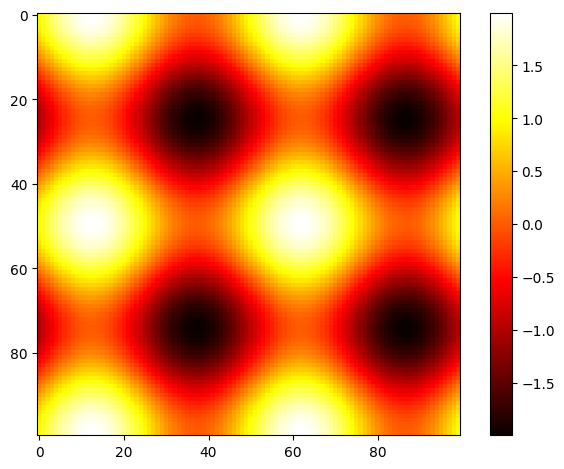

In [1823]:
# [ANSWER] 1.3.4
x = np.linspace(-2 * np.pi , 2 * np.pi, 100)
vcos = np.cos(x)
vsin = np.sin(x)
M = vcos[:, np.newaxis] + vsin

plt.imshow(M, cmap='hot')
plt.colorbar()
plt.show()


In [1824]:
# [TEST] testing results
print(vcos.shape)
print(vsin.shape)
print(M.shape)

print("5° cos  + 7° sin    => ", vcos[5] + vsin[7])
print("5° line + 7° column => ", M[5, 7])

(100,)
(100,)
(100, 100)
5° cos  + 7° sin    =>  1.5814167218228155
5° line + 7° column =>  1.5814167218228155


Bonus: En considérant une image noir et blanc comme une surface 3D dont l'altitude correspond à l'intensité lumineuse, affichez la figure précédente en 3D.

In [1825]:
# [TEST] testing meshgrid 
test = [1,2,3]
testA, testB = np.meshgrid(test, test)
print("1° part meshgrid => ", testA) # copies by rows
print("2° part meshgrid => ", testB) # copies by columns

1° part meshgrid =>  [[1 2 3]
 [1 2 3]
 [1 2 3]]
2° part meshgrid =>  [[1 1 1]
 [2 2 2]
 [3 3 3]]


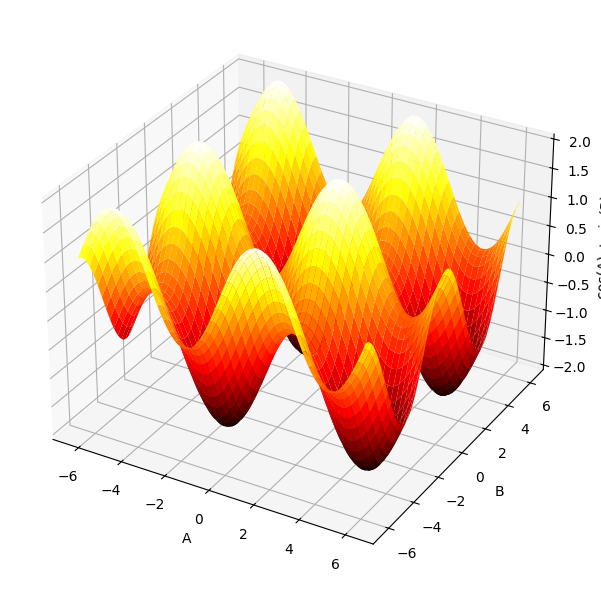

In [1826]:
# [ANSWER] 1.3.4
fig = plt.figure(figsize=(8, 6))
result = fig.add_subplot(projection='3d')
A, B = np.meshgrid(x, x)
result.plot_surface(A, B, M, cmap='hot')

result.set_zlabel('cos(A) + sin(B)')
result.set_xlabel('A')
result.set_ylabel('B')

plt.show()


# 2 - Régression linéaire

## 2.1 - Génération d'un problème de régression

La bibliothèque `scikit-learn` permet de générer un problème de régression et de le résoudre.
Vous pouvez par exemple générer un problème de régression linéaire à l'aide de la fonction `make_regression` ( https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_regression.html ).

Générez un problème de régression linéaire composé de 50 points avec:
- une dimension de descripteur,
- une dimension informative,
- une dimension cible,
- un bruit d'écart type 5,
- un biais de 50.

Affichez les points obtenus. Pour simplifier la suite vous stockerez les abscisses dans un vecteur `x` et les ordonnées dans un vecteur `y`. Vérifiez vos dimensions pour n'avoir qu'une dimension dans les deux cas.

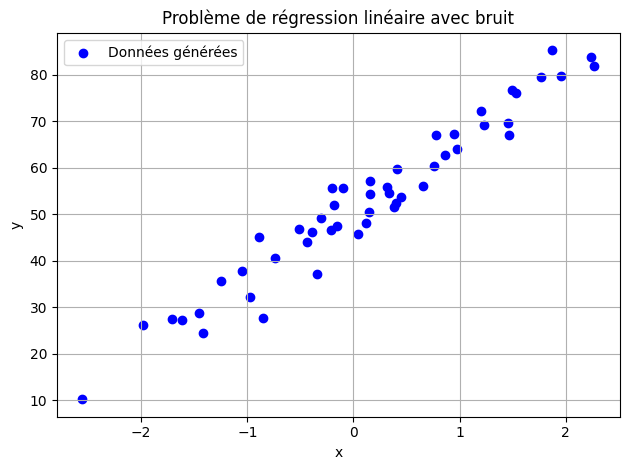

In [1827]:
# [ANSWER] 2.1
from sklearn.datasets import make_regression
x, y = make_regression(
    n_samples=50,    # points
    n_features=1,    # descriptor dimension
    n_informative=1, # informative  dimension
    n_targets=1,     # target dimension
    noise=5,         # standard deviation noise
    bias=50, 
    random_state=0)

x = x.flatten() # prevent bugs
plt.scatter(x, y, color='b', label="Données générées")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problème de régression linéaire avec bruit")
plt.legend()
plt.grid()
plt.show()

## 2.2 - Résolution analytique

En vous basant sur votre cours, qu'elle est la formule analytique permettant de résoudre ce problème de régression ? 

In [1828]:
# [ANSWER] 2.2
# Remplacez les ? par votre réponse
formule = '$\\theta_0 = \\bar{y} - \\theta_1 \\bar{x} $\
        $\\newline$\
        $\\theta_1 = \\frac{\\sum (x_i - \\bar{x})(y_i - \\bar{y})}{\\sum (x_i - \\bar{x})^2}$\
        $\\newline ou \\newline$  \
        $\\theta_1 = \\frac{\\overline{x y} - \\overline{x} \\cdot \\overline{y}}{\\overline{x^2} - \\overline{x}^2}$\
        $= \\frac{Cov(x,y)}{Var(x)}$'
display(Markdown(formule))



$\theta_0 = \bar{y} - \theta_1 \bar{x} $        $\newline$        $\theta_1 = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sum (x_i - \bar{x})^2}$        $\newline ou \newline$          $\theta_1 = \frac{\overline{x y} - \overline{x} \cdot \overline{y}}{\overline{x^2} - \overline{x}^2}$        $= \frac{Cov(x,y)}{Var(x)}$

En utilisant la question précédente et les fonctions statistique de `numpy` ( 
https://numpy.org/doc/stable/reference/routines.statistics.html ), donnez l'équation de la meilleure droite résolvant ce problème de régression.

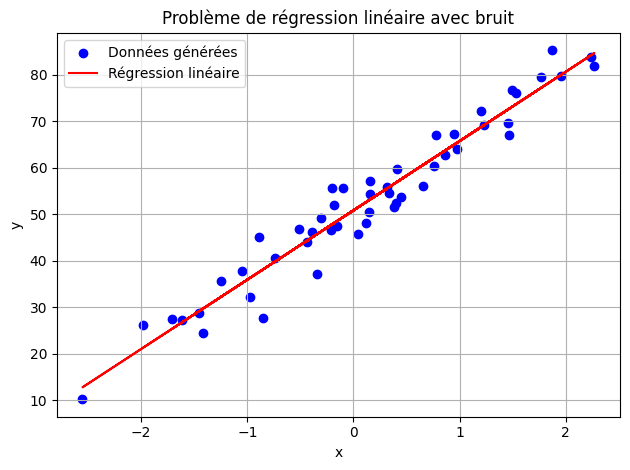

In [1829]:
# [ANSWER] 2.2
cov_xy = np.mean(x * y) - np.mean(x) * np.mean(y)
var_x = np.mean(x ** 2) - np.mean(x) ** 2
w1 =  cov_xy / var_x
w0 = np.mean(y) - (np.mean(x) * w1)

plt.scatter(x, y, color='b', label="Données générées")
plt.plot(x, (w1 * x) + w0, color='r', label="Régression linéaire")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problème de régression linéaire avec bruit")
plt.legend()
plt.grid()
plt.show()

In [1830]:
# [TEST] testing results
print("x shape => ", x.shape)
print("y shape => ", y.shape)
print("x mean => ", np.mean(x))
print("y mean => ", np.mean(y))
print("xy mean => ", np.mean(x * y))
print("xmean * ymean => ", np.mean(x) * np.mean(y))
print("x^2 mean => ", np.mean(x ** 2))
print("x mean ^2 => ", np.mean(x) ** 2)
print("cov_xy => ", np.mean(x * y) - np.mean(x) * np.mean(y))
print("var_x => ", np.mean(x ** 2) - np.mean(x) ** 2)
print("w1 => ", w1)
print("w0 => ", w0)

x shape =>  (50,)
y shape =>  (50,)
x mean =>  0.14055927231309787
y mean =>  52.95234548674499
xy mean =>  26.328781802924894
xmean * ymean =>  7.442943148888627
x^2 mean =>  1.2865587537274978
x mean ^2 =>  0.0197569090331876
cov_xy =>  18.885838654036267
var_x =>  1.2668018446943103
w1 =>  14.908281617314486
w0 =>  50.85684827117653


## 2.3 - Résolution avec scikit-learn

La bibliothèque `scikit-learn` permet de résoudre directement un problème de régression linéaire en utilisant la classe `LinearRegression` ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html ). À l'aide de la documentation, résolvez le problème de régression précédent. Attention aux dimensions des entrées de la fonction `fit`.

Coef or w1 =>  [14.90828162]
Intercept or w0 =>  50.85684827117653
|Coef - w1| =>  [0.]
|Intercept - w0| =>  0.0


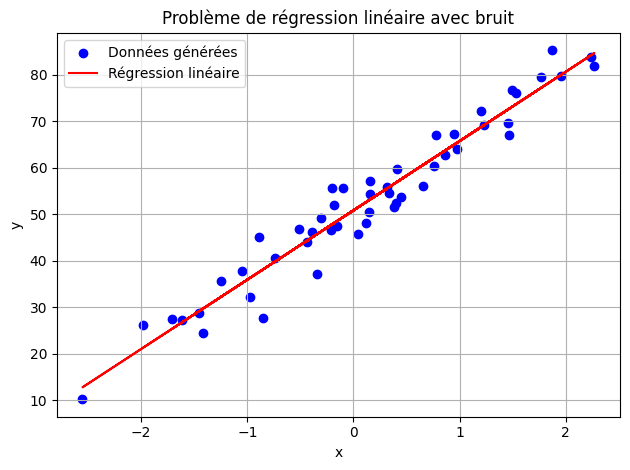

In [1831]:
# [ANSWER] 2.3
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x[:,np.newaxis], y)
print("Coef or w1 => ", model.coef_)
print("Intercept or w0 => ", model.intercept_)
print("|Coef - w1| => ", np.abs(model.coef_ - w1))
print("|Intercept - w0| => ", np.abs(model.intercept_- w0))

plt.scatter(x, y, color='b', label="Données générées")
plt.plot(x, (model.coef_ * x) + model.intercept_, color='r', label="Régression linéaire")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problème de régression linéaire avec bruit")
plt.legend()
plt.grid()
plt.show()


Les résultats entre les deux méthodes de résolution sont-ils comparables ? 

##### [ANSWER] 2.3
Yes, we can consider that the results are almost the exact same.
There's just a difference of magnitude 1e-15 between the two w1.

## 2.4 - Prédire de nouvelles valeurs

Prédisez les valeurs régressées pour 100 points dans un intervalle compris entre min(x) et max(x).  Utilisez la formule d'une droite avec les paramètres trouvés aux questions précédentes puis utilisez la fonction `predict` du régresseur `scikit-learn`.

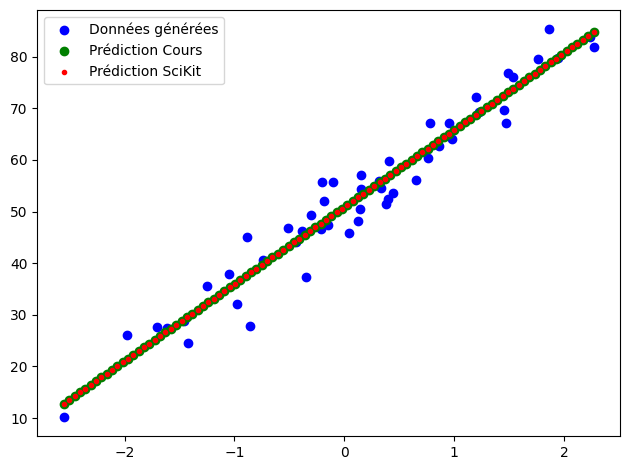

In [1832]:
# [ANSWER] 2.4
x_test = np.linspace(np.min(x), np.max(x), 100)
y_test_class = w1 * x_test + w0 
y_test_sckit = model.predict(x_test[:, np.newaxis])

plt.scatter(x, y, color='b', label="Données générées")
plt.scatter(x_test, y_test_class, color='g', marker="o", label="Prédiction Cours")
plt.scatter(x_test, y_test_sckit, color='r', marker=".", label="Prédiction SciKit")
plt.legend()
plt.show()

Les résultats obtenus vous semble-t-il satisfaisant  ? 

[ANSWER] 2.4
Yes, both of them got the regression in a position that
is close to a great amount of points. 

Est-il pertinent de chercher à effectuer une régression linéaire régularisée sur ce jeu de données (type
LASSO ou Ridge) ? Expliquez pourquoi.

## 2.5 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des paramètres (w,b) appris.

In [1833]:
def eval_regresseur(x,w,b):
    # [ANSWER] 2.5
    return w * x + b


Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [1834]:
def get_loss(x,y,w,b):
    # [ANSWER] 2.5
    return np.mean((eval_regresseur(x,w,b) - y) ** 2)

Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne deux valeurs correspondant à la dérivée de la fonction de coût par rapport à $b$ et la dérivée de la fonction de coût par rapport à $w$.

In [1835]:
def get_grad_loss(x,y,w,b):
    # [ANSWER] 2.5
    n = len(y)
    # partial derivative of loss function with respect to w and b
    grad_w = (2/n) * np.sum((eval_regresseur(x,w,b) - y) * x)
    grad_b = (2/n) * np.sum((eval_regresseur(x,w,b) - y))
    return grad_b, grad_w 

Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $w$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [1836]:
def train_regresseur(x,y,t,N_max):
    '''
    :param X: exemples d'apprentissage
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :parame N_max: nombre maximale d'itération de l'algorithme
    :return : les paramètres décrivant la droite apprise (w,b), ainsi que l'évolution de la fonction de coût
    '''
    # Initialisation aléatoire de w et b
    # [ANSWER] 2.5
    w, b = np.random.randn(2)
    loss = []
    for n in range(N_max):
        # Mise à jours de w,b par descente de gradient
        # [ANSWER] 2.5
        grad_b,grad_w = get_grad_loss(x,y,w,b)
        w = w - t * grad_w
        b = b - t * grad_b
        loss += [get_loss(x,y,w,b)]
    return w,b,np.array(loss)



Visualisez l'évolution de la fonction de coût durant l'apprentissage. Est-elle bien décroissante ? 

w =>  14.908281617314495
b =>  50.85684827117651


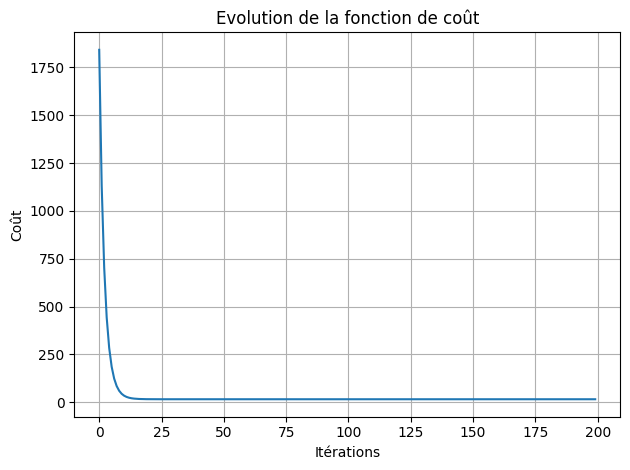

In [1837]:
# [ANSWER] 2.5
w,b,loss = train_regresseur(x,y,0.1,200)
print("w => ", w)
print("b => ", b)

plt.plot(loss)
plt.xlabel("Itérations")
plt.ylabel("Coût")
plt.title("Evolution de la fonction de coût")
plt.grid()
plt.show()

Visualisez la droite apprise par votre régresseur. Est-elle correcte ?

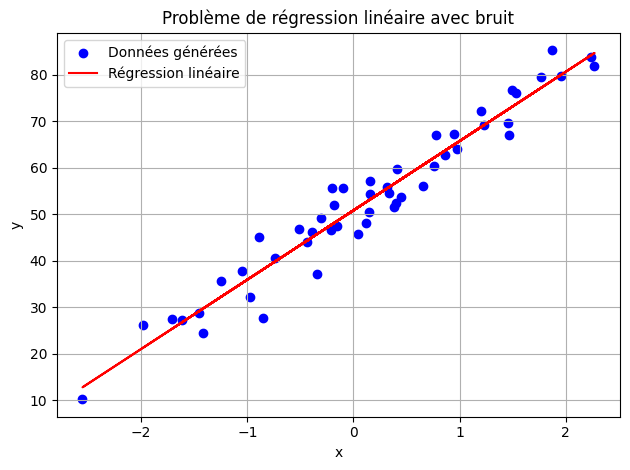

In [1838]:
# [ANSWER] 2.5
plt.scatter(x, y, color='b', label="Données générées")
plt.plot(x, eval_regresseur(x,w,b), color='r', label="Régression linéaire")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Problème de régression linéaire avec bruit")
plt.legend()
plt.grid()
plt.show()

# 3 - Régression polynomiale

Exécutez le code suivant pour générer un nouveau problème de régression

In [1839]:
d = data.make_regression(
    n_samples = 30,
    n_features = 1,
    n_informative = 1,
    n_targets = 2,
    noise = 10
)

x = d[0]
y = np.array((d[1][:,0]**2+0.3*d[1][:,1])[:,None])
y = y/max(y)

Affichez les données générées.

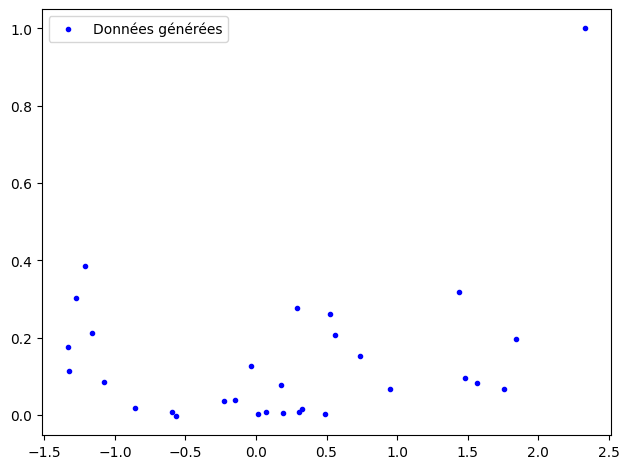

In [1840]:
# [ANSWER] 3
plt.scatter(x, y, color='b', marker=".", label="Données générées")
plt.legend()
plt.show()

A votre avis quel devrait être le degré d'un polynôme résolvant ce problème de régression ?

##### [ANSWER] 3
A degree of 2 is the best to avoid an underfitting or an overfitting.

## 3.1 Résolution analytique

En utilisant l'astuce vue en cours pour effectuer une régression polynomiale, faites la résolution analytique de ce problème de régression.

Theta =>  [[ 0.03088814]
 [-0.0087926 ]
 [ 0.10804585]]


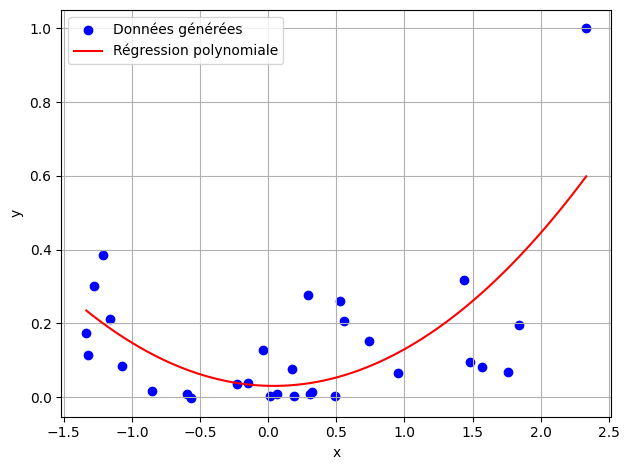

In [1841]:
# [ANSWER] 3.1

# The tip was to transform the weights and the x's 
# in two vectors of same dimension and y = w.T @ x
X_poly = np.hstack([np.ones((x.shape[0], 1)), x, x**2])

# slide 31 - Regression
theta = np.linalg.inv(X_poly.T @ X_poly) @ X_poly.T @ y
print("Theta => ", theta)

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
X_range_poly = np.hstack([np.ones((x_range.shape[0], 1)), x_range, x_range**2])
y_pred = X_range_poly @ theta

plt.scatter(x, y, color='blue', label="Données générées")
plt.plot(x_range, y_pred, color='red', label="Régression polynomiale")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()

## 3.2 Résolution avec scikit-learn

En utilisant la même astuce, résolvez ce problème de régression polynomial avec le régresseur linéaire de scikit-learn.

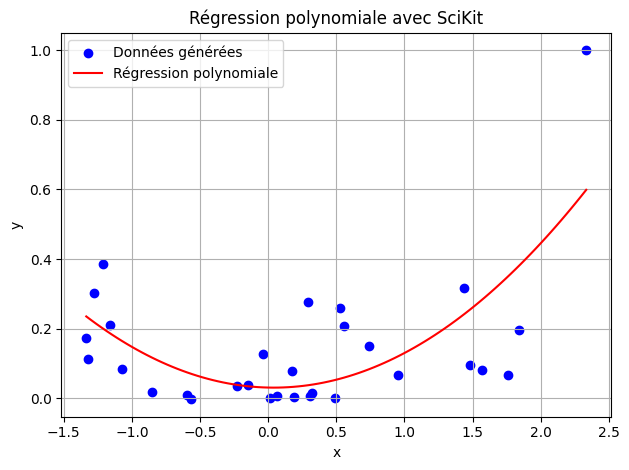

In [1842]:
# [ANSWER] 3.2
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

model = make_pipeline(PolynomialFeatures(2), LinearRegression())
model.fit(x, y)

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = model.predict(x_range)

plt.scatter(x, y, color='blue', label="Données générées")
plt.plot(x_range, y_pred, color='red', label="Régression polynomiale")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Régression polynomiale avec SciKit")
plt.show()


Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation. Tracez les courbes correspondantes et étudiez les valeurs des coefficients des
polynômes trouvés. Faites une analyse des résultats.

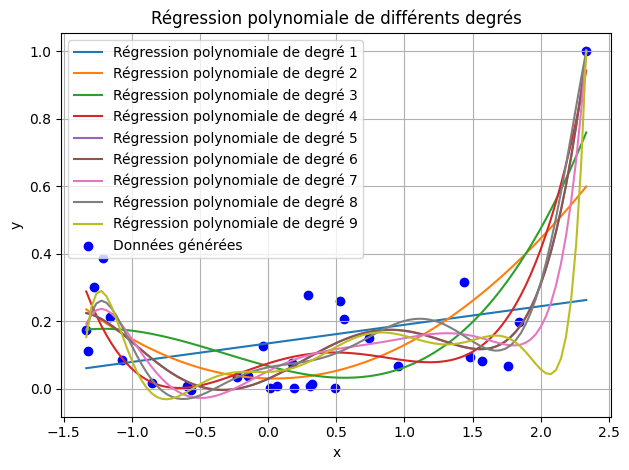

In [1843]:
# [ANSWER] 3.2

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

for degree in range(1, 10):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(x, y)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, label=f"Régression polynomiale de degré {degree}")

plt.scatter(x, y, color='blue', label="Données générées")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Régression polynomiale de différents degrés")
plt.show()


Testez également les modèles `linear_model.Ridge` et `linear_model.Lasso` à la place de linear model.LinearRegression
. Que pouvez-vous dire des résultats ? Faites varier le degré maximal du polynôme ainsi que le poids du
facteur de régularisation.

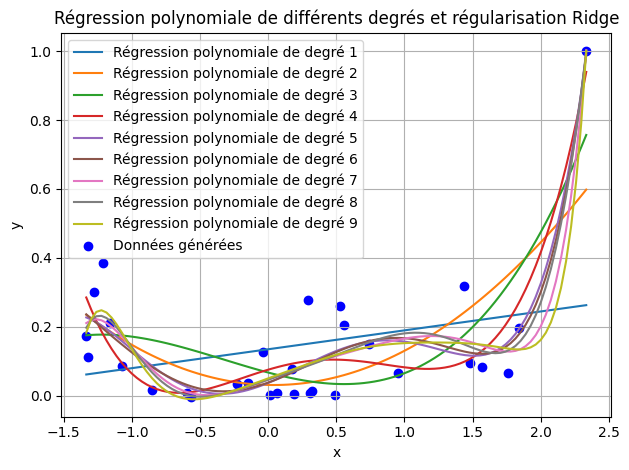

In [1844]:
# [ANSWER] 3.2
from sklearn.linear_model import Ridge

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

for degree in range(1, 10):
    model = make_pipeline(PolynomialFeatures(degree=degree), Ridge(alpha=0.1))
    model.fit(x, y)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, label=f"Régression polynomiale de degré {degree}")

plt.scatter(x, y, color='blue', label="Données générées")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Régression polynomiale de différents degrés et régularisation Ridge")
plt.show()



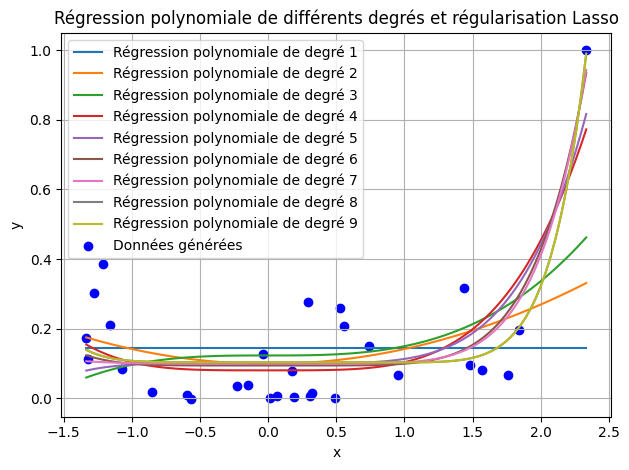

In [1845]:
# [ANSWER] 3.2
from sklearn.linear_model import Lasso

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

for degree in range(1, 10):
    model = make_pipeline(PolynomialFeatures(degree=degree), Lasso(alpha=0.1))
    model.fit(x, y)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, label=f"Régression polynomiale de degré {degree}")

plt.scatter(x, y, color='blue', label="Données générées")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Régression polynomiale de différents degrés et régularisation Lasso")
plt.show()


La documentation de scikit-learn propose une autre fonction pour la régression LASSO : linear model.LassoLars ( https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoLars.html ).
Quelle est la différence avec la précédente ? Testez cette fonction pour ce problème de régression.

##### [ANSWER] 3.2
Lasso model fit with Least Angle Regression a.k.a. Lars.
It is a Linear Model trained with an L1 prior as regularizer.

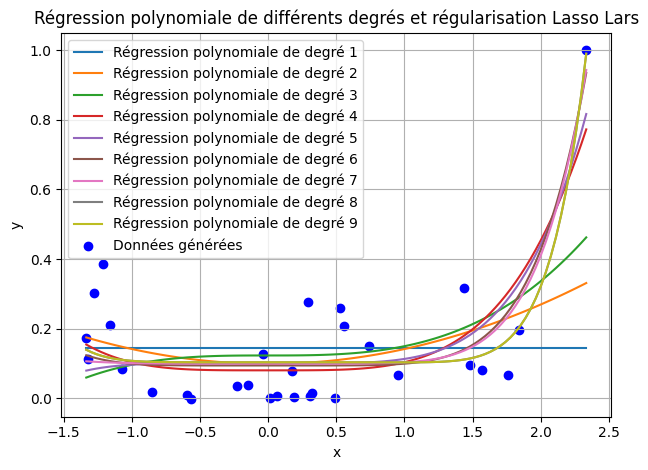

In [1846]:
# [ANSWER] 3.2
from sklearn.linear_model import LassoLars

x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

for degree in range(1, 10):
    model = make_pipeline(PolynomialFeatures(degree=degree), LassoLars(alpha=0.1))
    model.fit(x, y)
    y_pred = model.predict(x_range)
    plt.plot(x_range, y_pred, label=f"Régression polynomiale de degré {degree}")

plt.scatter(x, y, color='blue', label="Données générées")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.title("Régression polynomiale de différents degrés et régularisation Lasso Lars")
plt.show()

## 3.3 - Résolution avec une descente de gradient (numpy)

Nous allons dans cette partie coder directement un régresseur à l'aide de numpy sans utiliser la librairie scikit-learn en utilisant la méthode de descente de gradient.

Commencez par définir une fonction `eval_regresseur` permettant de calcul la sortie du régresseur à partir des poids appris (W). On utilisera l'astuce vue en cour pour intégrer le biais à $W$.

In [1847]:
def eval_regresseur(X,W):
    # [ANSWER] 3.3
    return X @ W

Écrivez une fonction `get_loss` permettant de calculer la fonction de coût optimisée durant l'apprentissage du régresseur.


In [1848]:
def get_loss(X,y,W):
    # [ANSWER] 3.3
    return np.mean((eval_regresseur(X,W) - y) ** 2)

Écrivez une fonction `get_grad_loss` permettant de calculer le gradient de la fonction de coût optimisée durant l'apprentissage du régresseur. Cette fonction retourne une valeur correspondant au gradient de la fonction de coût par rapport W.

In [1849]:
def get_grad_loss(X,y,W):
    # [ANSWER] 3.3
    n = len(y)
    grad = (2/n) * X.T @ (eval_regresseur(X,W) - y)
    return grad

Écrivez une fonction `train_regresseur` permettant de faire l'apprentissage d'un régresseur. Pour réaliser cette fonction, vous initialiserez les paramètres $W$ et $b$ définissant la droite au hasard. Vous utiliserez ensuite un algorithme de descente de gradient pour mettre à jours ces paramètres. Vous pouvez utiliser une boucle `for` pour cette question.

In [1850]:
def train_regresseur(X,y,t,N_max):
    '''
    :param X: exemples d'apprentissage (la première colonne doit contenir que des 1).
    :param y: labels des exemples d'apprentissage
    :param t: taux d'apprentissage / learning rate
    :parame N_max: nombre maximale d'itération de l'algorithme
    :return : les paramètres décrivant la droite apprise
    '''
    #y = y[:,None]
    # [ANSWER] 3.3
    W = np.random.randn(X.shape[1],1)
    loss = []
    for n in range(N_max):
        # Mise à jours de w,b par descente de gradient
        grad = get_grad_loss(X,y,W)
        W = W - t * grad
        loss += [get_loss(X,y,W)]
    return W,np.array(loss)

Visualisez la solution trouvée. 

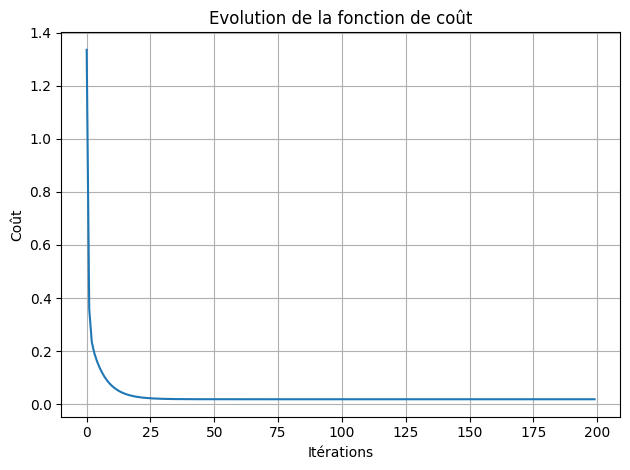

In [1851]:
# [ANSWER] 3.3

X = np.hstack([np.ones((x.shape[0], 1)), x, x**2])
W,loss = train_regresseur(X,y,0.1,200)

plt.plot(loss)
plt.xlabel("Itérations")
plt.ylabel("Coût")
plt.title("Evolution de la fonction de coût")
plt.grid()
plt.show()


In [1852]:
print("W => ", W)

W =>  [[ 0.03088812]
 [-0.00879261]
 [ 0.10804586]]


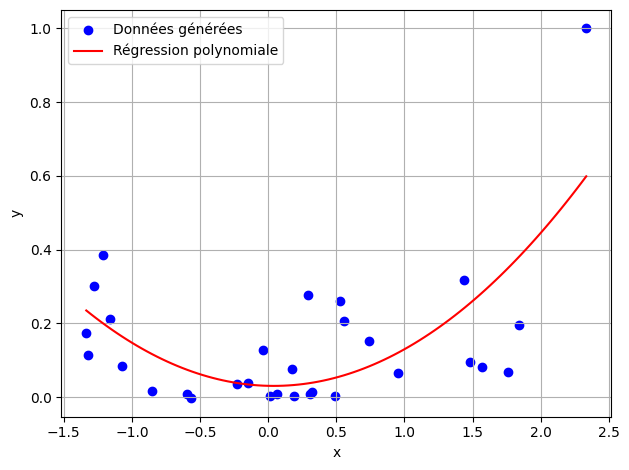

In [1853]:
# [ANSWER] 3.3
x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
y_pred = x_range ** 2 * W[2] + x_range * W[1] + W[0]

plt.scatter(x, y, color='b', label="Données générées")
plt.plot(x_range, y_pred, color='r', label="Régression polynomiale")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid()
plt.show()